In [73]:
import networkx as nx
import pandas as pd
import numpy as np
import random 
import scipy.stats as stats
import matplotlib.pyplot as plt
import sys, os

In [74]:
my_path = os.path.abspath("")
data = pd.read_csv(my_path + "/Data_initial" + '/fb-messages.edges', delimiter=',')

In [75]:
print(data)

        730  730.1  1080090715.0
0       563    563  1.080091e+09
1       674    674  1.080718e+09
2       571    571  1.081366e+09
3       667    667  1.082013e+09
4       563    667  1.082034e+09
...     ...    ...           ...
61728  1382    979  1.098769e+09
61729  1382   1322  1.098770e+09
61730  1382     28  1.098770e+09
61731  1098     67  1.098770e+09
61732  1098     67  1.098770e+09

[61733 rows x 3 columns]


In [76]:
data.rename(columns = {'730':'Source', '730.1':'Target', '1080090715.0':'Time_start'}, inplace = True )

In [77]:
print(data)

       Source  Target    Time_start
0         563     563  1.080091e+09
1         674     674  1.080718e+09
2         571     571  1.081366e+09
3         667     667  1.082013e+09
4         563     667  1.082034e+09
...       ...     ...           ...
61728    1382     979  1.098769e+09
61729    1382    1322  1.098770e+09
61730    1382      28  1.098770e+09
61731    1098      67  1.098770e+09
61732    1098      67  1.098770e+09

[61733 rows x 3 columns]


In [78]:
data_1 = data.iloc[0:100]

In [79]:
print(data_1)

    Source  Target    Time_start
0      563     563  1.080091e+09
1      674     674  1.080718e+09
2      571     571  1.081366e+09
3      667     667  1.082013e+09
4      563     667  1.082034e+09
..     ...     ...           ...
95    1855    1855  1.082444e+09
96     278     278  1.082446e+09
97      55      55  1.082446e+09
98     362     362  1.082449e+09
99    1482    1482  1.082450e+09

[100 rows x 3 columns]


In [80]:
data_1.to_csv(my_path + "/Data_postproc" + '/output.csv', encoding='utf-8', \
              date_format="%Y-%m-%d-%H-%M-%S", index=False)

In [81]:
data_1.to_csv(my_path + "/Data_postproc" + '/fb-messages.csv', encoding='utf-8', date_format="%Y-%m-%d-%H-%M-%S", index=False)

<span style="color:orange">
    
## Исследование распределения связей ##

In [82]:
X = np.empty(1)

for i in data['Source'].unique():
    X = np.append(X, (data[data['Target'] == i].size))

Xord = np.sort(X, axis=0)
MaxN = len(X)

In [83]:
print(X)

[  0. 405.  15. ...   6.   6.   3.]


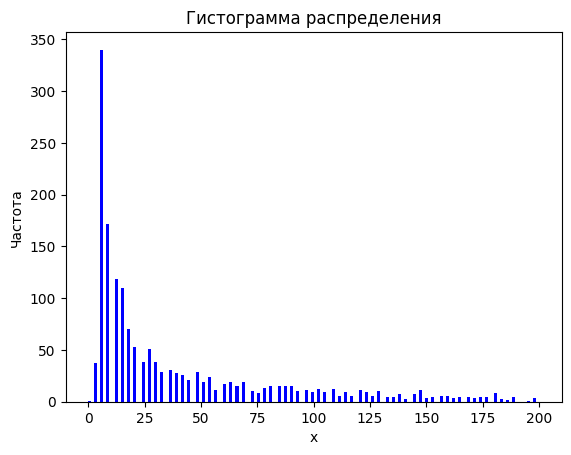

In [84]:
plt.hist(X, bins = 150, range = (0, 200), color = 'blue')
plt.xlabel('x')
plt.ylabel('Частота')
plt.title("Гистограмма распределения")
plt.show()

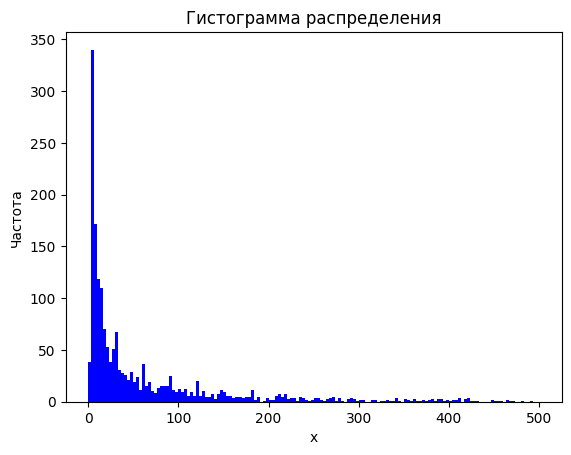

In [85]:
plt.hist(X, bins = 150, range = (0, 500), color = 'blue')
plt.xlabel('x')
plt.ylabel('Частота')
plt.title("Гистограмма распределения")
plt.show()

/tmp/ipykernel_4334/3552361926.py:18: RuntimeWarning: invalid value encountered in scalar divide
  Rn[n][p] = Mn / Sn


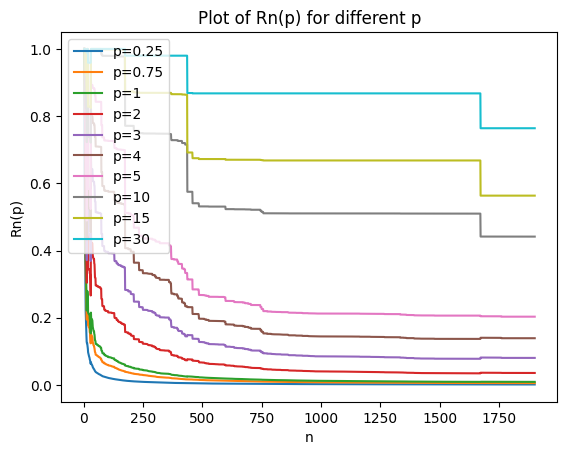

In [86]:
#2 exersice

arrP = [0.25, 0.75,1, 2, 3, 4, 5, 10, 15, 30] #задание диапозона на p
MaxP = len(arrP)
n = 0 
p = 0 
modX = np.zeros((MaxN, MaxP))
Rn = np.zeros((MaxN, MaxP))


for p in range(0, MaxP):
    modX[:, p] = np.power(np.abs(X), arrP[p])
    Mn = 0
    Sn = 0
    for n in range(1, MaxN): 
        Mn = np.max(modX[0:n, p])
        Sn = np.sum(modX[0:n, p])
        Rn[n][p] = Mn / Sn


pltN = np.arange(1, MaxN+1, 1)
legend = []

for p in range(0, MaxP):
    plt.plot(pltN, Rn[:, p])
    legend.append(f"p={arrP[p]}")
    
plt.legend(legend, loc="upper left")
plt.xlabel('n') #Подпись для оси х
plt.ylabel('Rn(p)') #Подпись для оси y
plt.title('Plot of Rn(p) for different p') #Название
plt.show()



#Не понятно как сделать выводы о моментах 

<span style="color:orange">

По итогам исследования можно сказать, 
Для $p \in \lbrace 0.25, 0.75, 1, 2 \rbrace $ $R_{n}(p)$ по всей видимости стремиться к нулю при возрастании n.
Для $p \in \lbrace 3, 4, 5, 10, 15, 30 \rbrace $ $ Rn(p)$ по всей видимости стремиться к положительной константе при возрастании n.

Вывод: $E|X|^{p} < \infty$ для $p \leqslant 2$ только, $E|X|^{p} = \infty$ для $p > 2$.


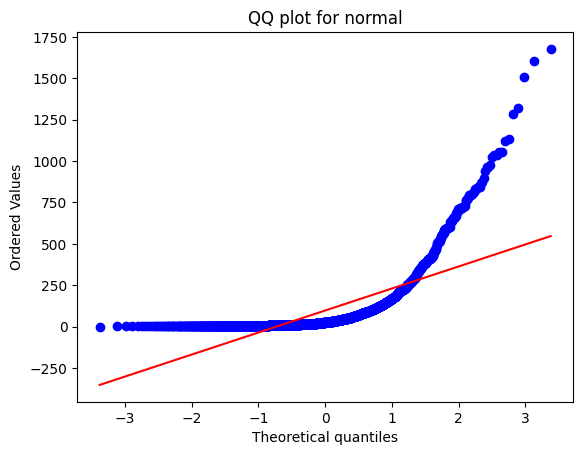

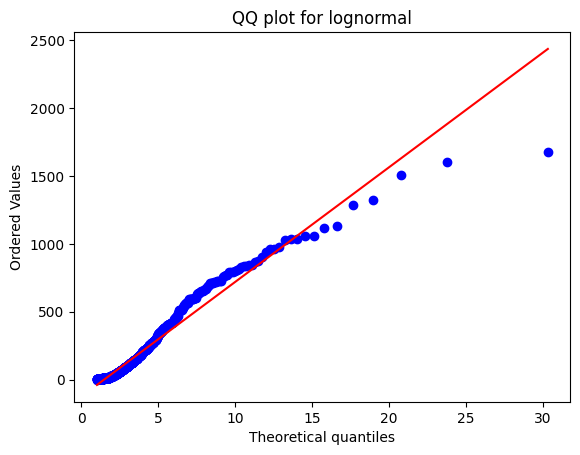

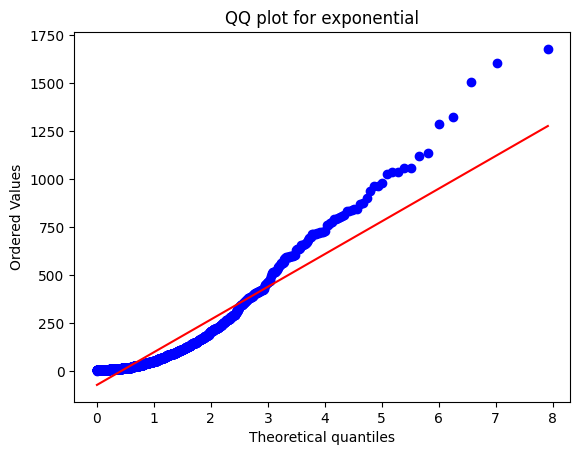

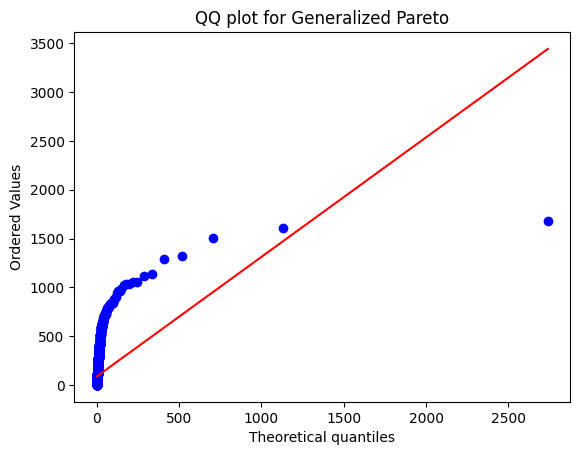

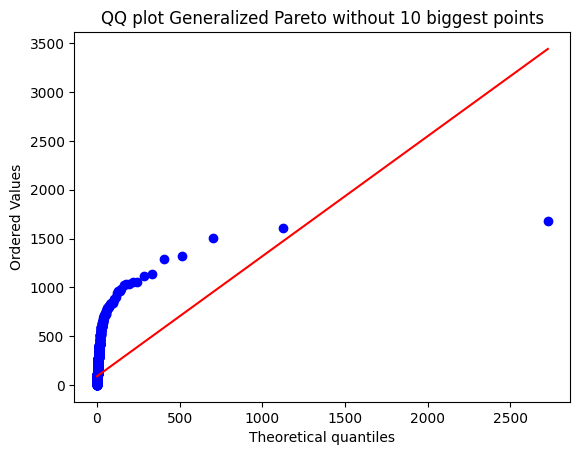

In [87]:
#3 exersice

stats.probplot(Xord, dist="norm", plot=plt)
plt.title('QQ plot for normal') #Название
#plt.ylim([-5, 20])
plt.show()

stats.probplot(Xord, dist=stats.lognorm(1,1), plot=plt)
plt.title('QQ plot for lognormal') #Название
#plt.ylim([-5, 20])
plt.show()

stats.probplot(Xord, dist=stats.expon, plot=plt)
plt.title('QQ plot for exponential') #Название
#plt.ylim([-5, 20])
plt.show()

stats.probplot(Xord, dist=stats.genpareto(1), plot=plt)
plt.title('QQ plot for Generalized Pareto') #Название
#plt.xlim([0, 200])
#plt.ylim([-5, 20])
plt.show()

plt_dat = np.arange(1, 10, 1) 
Xord_noP = np.delete(Xord, plt_dat, axis=0)
stats.probplot(Xord_noP, dist=stats.genpareto(1), plot=plt)
plt.title('QQ plot Generalized Pareto without 10 biggest points') #Название
#plt.xlim([0, 200])
#plt.ylim([-5, 20])
plt.show()

#зависит ли QQ plot от параметров распределений типа (1, 1)
#В парето распределении какое задавать гамма и сигма


<span style="color:orange">

Постановка задачи:
Построить QQ-plot для упорядоченных данных для распределений: нормального, логнормального, экспоненциального и Парето общего.

На графиках представлен QQ-plot, где красная линия $y=x$
Вывод: логнормальное распределение относительно подходит под выборку.

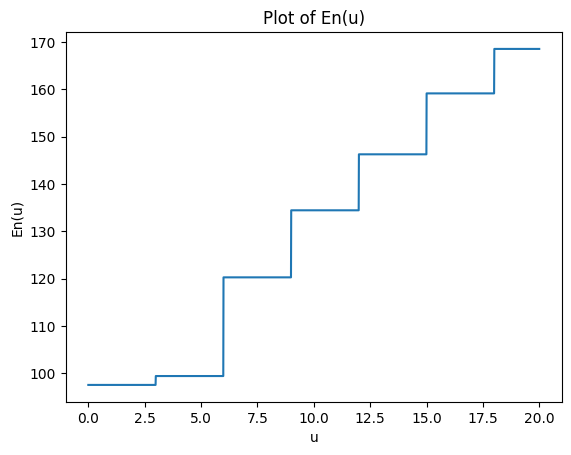

In [88]:
#4 exersice

U = np.arange(0.01, 20, 0.01)
En = np.zeros(len(U))
SumUp = 0
SumDn = 0

for u in range (0, len(U)):
    SumUp = 0
    SumDn = 0
    for i in range (0, len(X)):
        if (X[i] > U[u]):
            SumUp += X[i]
            SumDn += 1
    En[u] = SumUp / SumDn


pltN = np.arange(1, MaxN+1, 1)
legend = []

plt.plot(U, En)
plt.xlabel('u') #Подпись для оси х
plt.ylabel('En(u)') #Подпись для оси y
plt.title('Plot of En(u)') #Название
plt.show()


<span style="color:orange">

Видно что для больших u график $e_{n}(u)$ стремится к бесконечности, что означает, что распределение принадлежит к классу распределений с тяжёлыми хвостами.

Вывод: распределение имеет тяжёлые хвосты.

/tmp/ipykernel_4334/2998162275.py:14: RuntimeWarning: divide by zero encountered in log
  GammaH[k] = (1/(k+1)) * np.sum(np.log(Xord[-1:-(k+2):-1])) - np.log(Xord[-(k+2)])
/tmp/ipykernel_4334/2998162275.py:39: RuntimeWarning: divide by zero encountered in log
  SumDn += (np.log(Xord[-1-i+1]) - np.log(Xord[-1-k])) ** 2
/tmp/ipykernel_4334/2998162275.py:41: RuntimeWarning: invalid value encountered in scalar divide
  GammaM[k] = GammaH[k] + 1 - 0.5 / (1 - (GammaH[k] ** 2) / SumDn)
/tmp/ipykernel_4334/2998162275.py:48: RuntimeWarning: invalid value encountered in scalar multiply
  UH[i] = Xord[-(i+2)] * GammaH[i]


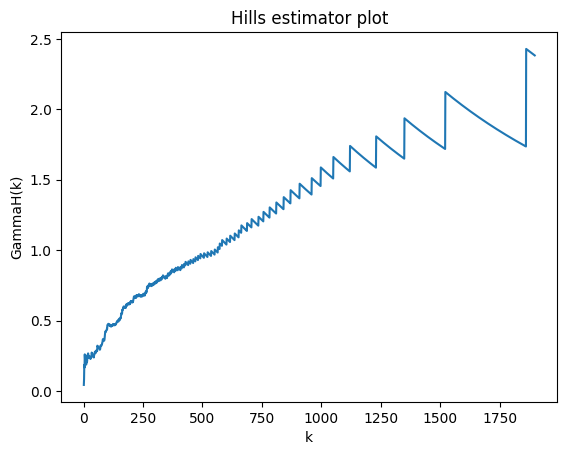

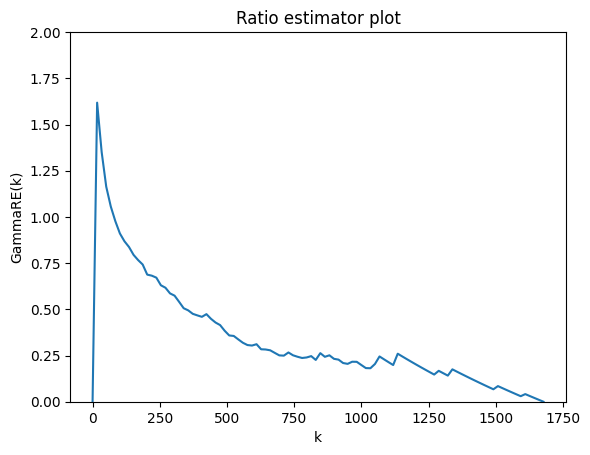

1.3132097610571547


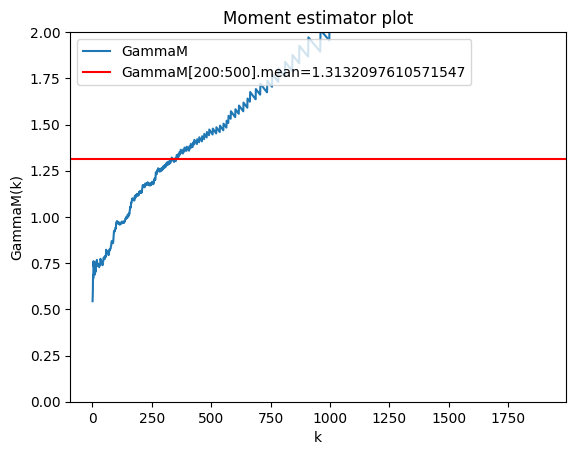

0.3249784502738884


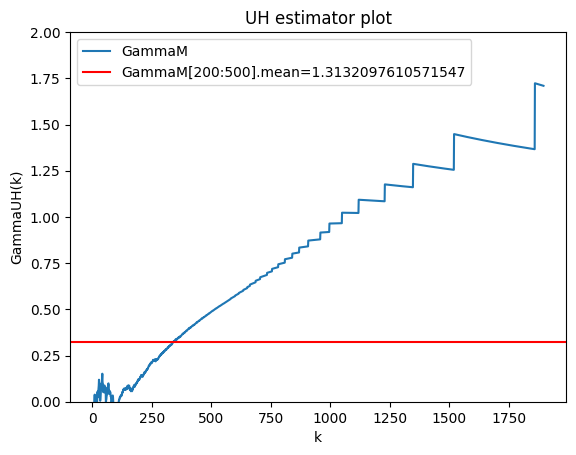

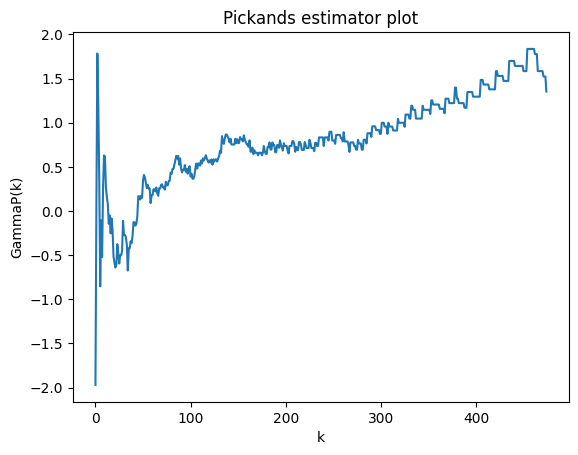

In [89]:
#5 exersice

MaxN = len(X) - 1
MaxNRange = len(X)
MaxK = len(X) - 1


#Hills estimator
def Hill(X):
    GammaH = np.zeros(MaxK)
    Xord = np.sort(X, axis=0)
    Max = len(X) - 1
    for k in range (0, Max):
        GammaH[k] = (1/(k+1)) * np.sum(np.log(Xord[-1:-(k+2):-1])) - np.log(Xord[-(k+2)])
    return GammaH

GammaH = Hill(X)


#Ratio estimator
Level = np.linspace(Xord[0], Xord[-1], 100)
REst = np.zeros(len(Level))

for n in range (1, len(Level)-1):
    SumUp = 0
    SumDn = 0
    for i in range(0, len(X)):
        if (X[i] > Level[n]):
            SumUp += np.log(X[i] / Level[n])
            SumDn += 1
    REst[n] = SumUp / SumDn


#Moment estimator
GammaM = np.zeros(MaxK)
for k in range (0, MaxK):
    SumDn = 0
    for i in range(0, k+1): 
        SumDn += (np.log(Xord[-1-i+1]) - np.log(Xord[-1-k])) ** 2
    SumDn /= k+1
    GammaM[k] = GammaH[k] + 1 - 0.5 / (1 - (GammaH[k] ** 2) / SumDn)


#UH estimator
GammaUH = np.zeros(MaxK)
UH = np.zeros(MaxK)
for i in range(0, MaxK):
    UH[i] = Xord[-(i+2)] * GammaH[i]

for k in range (0, MaxK-1):
    GammaUH[k] = (1/(k+1)) * np.sum(np.log(UH[0:k+1])) - np.log(UH[k+1])  
GammaUH[MaxK-1] = GammaUH[MaxK-2]

#Pickands's estimator
GammaP = np.zeros(round(MaxK/4))
for k in range(0, round(MaxK/4)):
    GammaP[k] = (1/np.log(2)) * (np.log((Xord[-(1+k)] - Xord[-(2*k+2)]) /(Xord[-(2*k+2)] - Xord[-(4*k+4)])))
    

PltN = np.arange(1, MaxN+1, 1)
PltP = np.arange(0, round(MaxK/4), 1)
legend = []

plt.plot(PltN, GammaH)
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaH(k)') #Подпись для оси y
plt.title('Hills estimator plot') #Название
#plt.savefig(my_path + '/Exercise51.png')
plt.show()

plt.plot(Level, REst)
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaRE(k)') #Подпись для оси y
plt.title('Ratio estimator plot') #Название
plt.ylim(0, 2)
#plt.savefig(my_path + '/Exercise52.png')
plt.show()

plt.plot(PltN, GammaM)
plt.axhline(y = GammaM[200:500].mean(), color = 'r', linestyle = '-')
print(GammaM[200:500].mean())
legend.append("GammaM")
legend.append(f"GammaM[200:500].mean={GammaM[200:500].mean()}")
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaM(k)') #Подпись для оси y
plt.title('Moment estimator plot') #Название
plt.ylim(0, 2)
plt.legend(legend, loc="upper left")
#plt.savefig(my_path + '/Exercise53.png')
plt.show()

legend = []
plt.plot(PltN, GammaUH)
plt.axhline(y = GammaUH[200:500].mean(), color = 'r', linestyle = '-')
print(GammaUH[200:500].mean())
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaUH(k)') #Подпись для оси y
plt.title('UH estimator plot') #Название
plt.ylim(0, 2)
legend.append("GammaM")
legend.append(f"GammaM[200:500].mean={GammaM[200:500].mean()}")
plt.legend(legend, loc="upper left")
#plt.savefig(my_path + '/Exercise54.png')
plt.show()

plt.plot(PltP, GammaP)
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaP(k)') #Подпись для оси y
plt.title('Pickands estimator plot') #Название
#plt.ylim(0, 2)
#plt.savefig(my_path + '/Exercise55.png')
plt.show()
#Прочитать, что значит знак гаммы
#Как выбирать xn в Ratio Estimator, он из выборки или нет.

In [90]:
#Mixed moment estimator
# n in []

def L_MM_n(k, n, X):  
    X_MM = 0
    for i in range(1, k):
        X_MM += X[n-k] / X[n-i+1]
        
    out = (1 - (1/k) * X_MM)
    return out


def M_MM_n(k, n, X):
    X_MM = 0
    for i in range(1, k):
        X_MM += np.log(X[n-i+1] / X[n-k])
        
    out = (1/k) * X_MM
    return out


def MM_phi(k, n, X):
    out = (M_MM_n(k, n, X) - L_MM_n(k, n, X)) / (L_MM_n(k, n, X) * L_MM_n(k, n, X))
    return out


def GammaMM_k(X, k):
    n = len(X) - 1
    out = (MM_phi(k, n, X) - 1) / (1 + 2 * np.min(MM_phi(k, n, X) - 1))
    return out

def GammaMM_all(X):
    num_gamma = np.zeros(len(X))
    for k in range(1, len(X)):
        num_gamma[k] =  GammaMM_k(X, k)
    return num_gamma

def GammaMM_plot(X):
    num_gamma = GammaMM_all(X)
    PltN = np.arange(0, len(X), 1)
       
    plt.plot(PltN, num_gamma)
    plt.axhline(y = num_gamma[200:500].mean(), color = 'r', linestyle = '-')
    print(num_gamma[200:500].mean())
    legend.append("num_gamma")
    legend.append(f"num_gamma[200:500].mean={num_gamma[200:500].mean()}")
    plt.xlabel('k') #Подпись для оси х
    plt.ylabel('num_gamma(k)') #Подпись для оси y
    plt.title('Mixed Moment estimator plot') #Название
    plt.ylim(0, 2)
    plt.legend(legend, loc="upper left")
    #plt.savefig(my_path + '/Exercise53.png')
    plt.show()

/tmp/ipykernel_4334/1396878843.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  out = (M_MM_n(k, n, X) - L_MM_n(k, n, X)) / (L_MM_n(k, n, X) * L_MM_n(k, n, X))
/tmp/ipykernel_4334/1396878843.py:29: RuntimeWarning: invalid value encountered in scalar divide
  out = (MM_phi(k, n, X) - 1) / (1 + 2 * np.min(MM_phi(k, n, X) - 1))


-0.44415676402344445


/tmp/ipykernel_4334/1396878843.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  X_MM += np.log(X[n-i+1] / X[n-k])


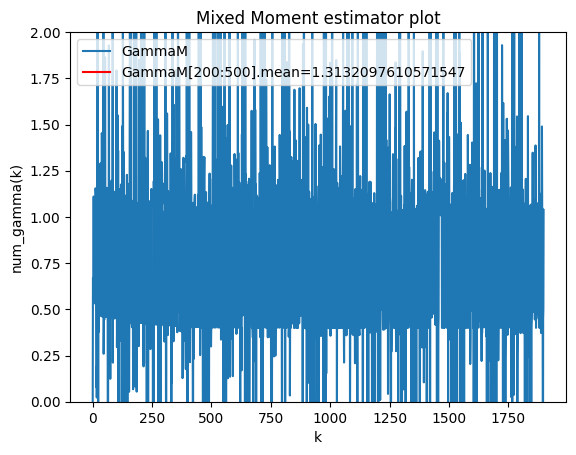

In [91]:
GammaMM_plot(X)


<span style="color:orange">

Оценку хвостового индекса сделать затруднительно.

/tmp/ipykernel_4334/2998162275.py:14: RuntimeWarning: divide by zero encountered in log
  GammaH[k] = (1/(k+1)) * np.sum(np.log(Xord[-1:-(k+2):-1])) - np.log(Xord[-(k+2)])
/tmp/ipykernel_4334/2998162275.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  GammaH[k] = (1/(k+1)) * np.sum(np.log(Xord[-1:-(k+2):-1])) - np.log(Xord[-(k+2)])
/home/mikle/ML/Girafe/env/lib/python3.11/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


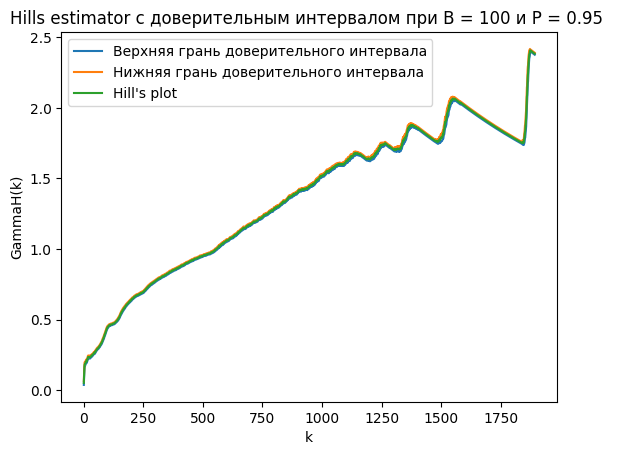

In [92]:
#6 exersice

MaxN = len(X)
B = 100
PlotCIup = []
PlotCIdn = []
PlotCImn = []

#Bootstrap
y = np.zeros((B, MaxN))
GammaH_Boot = np.zeros((B, MaxN-1))
Gamma_stable = np.zeros(B) #стабильность графика замечается на 300 значении

#StDev_Gamma = np.zeros(B)
for i in range(B):
    for j in range(MaxN):
        y[i,j] = random.choice(list(X))
    GammaH_Boot[i,:] = Hill(y[i,:])
#        Mean_Gamma[i] = GammaH_Boot[i,:].mean()
#        StDev_Gamma[i] = GammaH_Boot[i,:].std()
#    Gamma_stable[i] = GammaH_Boot[i, 300]

for i in range(MaxN-1):
#    Data75 = stats.norm.interval(0.75, loc=np.mean(Gamma_stable), scale=stats.sem(Gamma_stable))
    Data95 = stats.norm.interval(0.95, loc=np.mean(GammaH_Boot[:, i]), scale=stats.sem(GammaH_Boot[:, i]))
#    Data99 = stats.norm.interval(0.99, loc=np.mean(Gamma_stable), scale=stats.sem(Gamma_stable))
    PlotCIup.append(Data95[0])
    PlotCIdn.append(Data95[1])
    PlotCImn.append(GammaH_Boot[:, i].mean())

legend = []

plt.plot(PlotCIup)
legend.append("Верхняя грань доверительного интервала")
plt.plot(PlotCIdn)
legend.append("Нижняя грань доверительного интервала")
plt.plot(PlotCImn)
legend.append("Hill's plot")

plt.legend(legend, loc="upper left")
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaH(k)') #Подпись для оси y
plt.title(f"Hills estimator с доверительным интервалом при B = {B} и P = {0.95} ") #Название
#plt.savefig(my_path + '/Exercise6.png')
plt.show()

<span style="color:orange">
    
## Разбиение на сообщества ##

In [94]:
my_path = os.path.abspath("")
data = pd.read_csv(my_path + "/Data_initial" + '/fb-messages.edges', delimiter=',')
data.rename(columns = {'730':'Source', '730.1':'Target', '1080090715.0':'Time_start'} \
           , inplace = True )

In [95]:
data_1 = data.iloc[0:60000]
data_1.drop(['Time_start'], axis= 1 , inplace= True)
data_list = data_1.values.tolist()

/tmp/ipykernel_4334/2316066493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.drop(['Time_start'], axis= 1 , inplace= True)


In [96]:
G = nx.Graph()
G.add_edges_from(data_list)

In [97]:
comm = nx.community.louvain_communities(G, seed=123)

In [98]:
print(comm)

[{1289, 911, 656, 1041, 1043, 542, 1695, 1197, 686, 1072, 1200, 1076, 693, 695, 1595, 66, 75, 716, 720, 465, 852, 597, 1879, 1376, 1122, 228, 740, 615, 488, 1391, 1392, 370, 627, 1138, 503, 1144, 1150}, {1537, 1027, 1284, 519, 525, 1037, 273, 1046, 792, 1318, 1320, 40, 1834, 1073, 563, 564, 1845, 822, 819, 1083, 573, 65, 322, 1355, 332, 333, 845, 1356, 337, 338, 850, 594, 853, 86, 596, 88, 1881, 81, 603, 351, 609, 99, 1893, 102, 869, 620, 1135, 1652, 628, 377, 1402, 379, 892, 125, 122, 128, 1669, 647, 910, 151, 667, 1437, 934, 1201, 180, 441, 699, 451, 1220, 454, 968, 1484, 1485, 1743, 721, 469, 730, 988, 735, 482, 1253, 1768, 1772, 1015}, {2, 1540, 517, 1543, 1544, 1545, 1035, 524, 19, 1558, 1559, 1049, 547, 550, 42, 1579, 1067, 1583, 561, 54, 1591, 1080, 1594, 571, 1596, 1601, 1101, 605, 1120, 1124, 1128, 621, 117, 632, 123, 1659, 642, 138, 1675, 1165, 653, 1168, 146, 1692, 157, 674, 675, 678, 679, 685, 190, 702, 703, 704, 705, 706, 707, 708, 709, 712, 1228, 205, 206, 1753, 1755, 126